In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import seaborn as sns

In [2]:
df1=pd.read_csv("C:\house.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

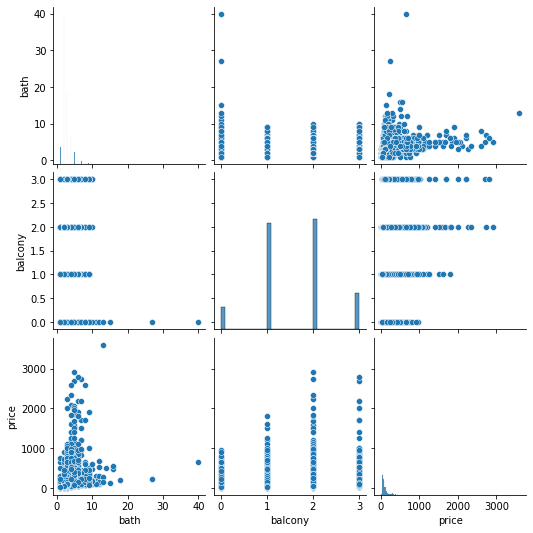

In [5]:
sns.pairplot(df1)

In [6]:
# value count of each feature
def value_count(df1):
  for var in df1.columns:
    print(df1[var].value_counts())
    print("--------------------------------")

In [7]:
value_count(df1)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
-----------------------------

<Axes: >

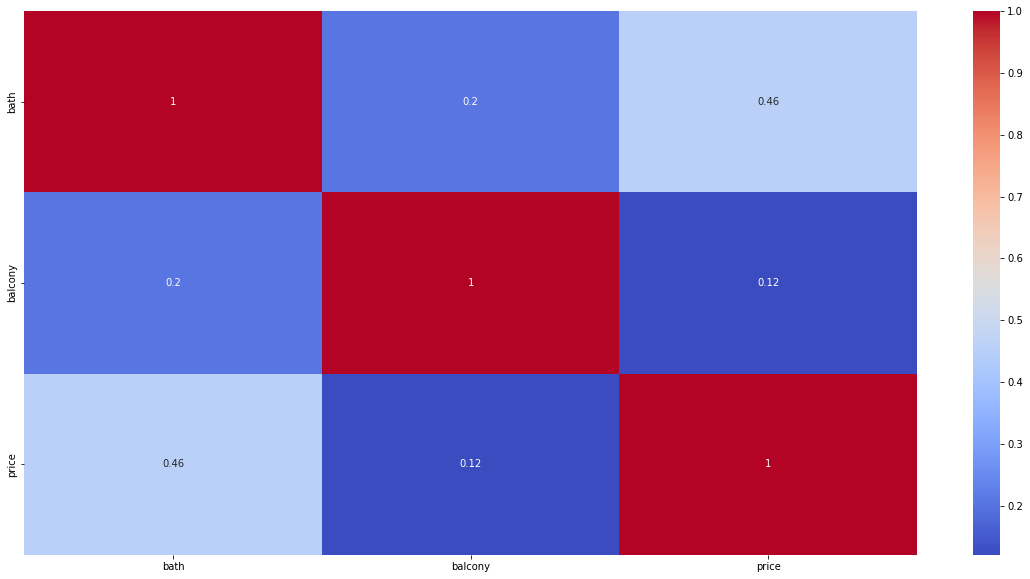

In [8]:
# correlation heatmap
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df1[num_vars].corr(),cmap="coolwarm", annot=True)

# correlation of bath is greater than a balcony with price

In [9]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df1.isnull().mean()*100 # % of measing value


#society has 41.3% missing value (need to drop)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<Axes: >

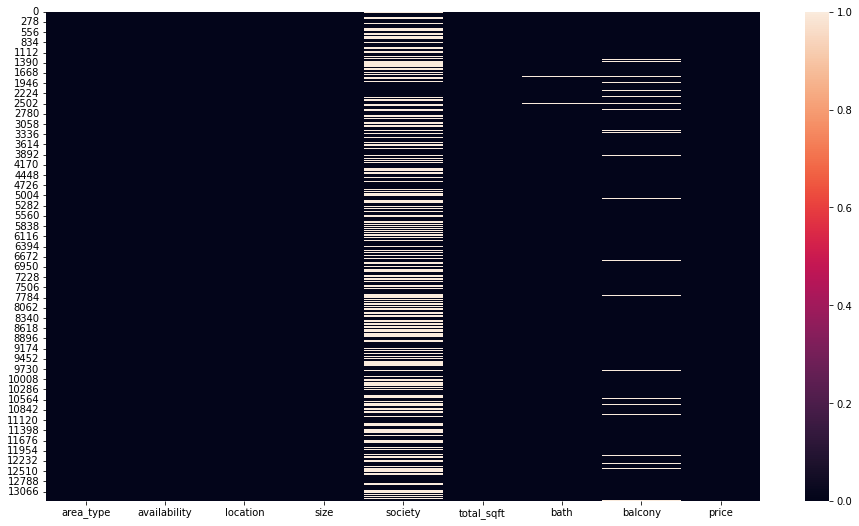

In [11]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(df1.isnull())

In [12]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [14]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3.shape

(13246, 5)

In [17]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\USER\AppData\Local\Temp\ipykernel_14168\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [19]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [22]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [24]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [25]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
convert_sqft_to_num('2166')

2166.0

In [27]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [28]:
convert_sqft_to_num('34.67Sq. Meter ')

In [29]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [30]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [31]:
df4.loc[0]

location      Electronic City Phase II
size                             2 BHK
total_sqft                      1056.0
bath                               2.0
price                            39.07
bhk                                  2
Name: 0, dtype: object

In [32]:
(2100+2850)/2

2475.0

In [33]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [34]:
df5=df4.copy()

In [35]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [37]:
len(df5.location.unique())

1304

In [38]:
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [39]:
len(df5.location)

13246

In [40]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [41]:
print(location_stats)

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64


In [42]:
len(location_stats[location_stats<=10])

1052

In [43]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [44]:
len(df5.location.unique())

1293

In [45]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [46]:
locations_stats = df5.groupby('location')['location'].agg('count')
locations_stats

location
1st Block Jayanagar            14
1st Phase JP Nagar             25
2nd Phase Judicial Layout      11
2nd Stage Nagarbhavi           24
5th Block Hbr Layout           12
                             ... 
Yelahanka                     210
Yelahanka New Town             41
Yelenahalli                    13
Yeshwanthpur                   85
other                        2881
Name: location, Length: 242, dtype: int64

In [47]:
df5.shape

(13246, 7)

In [48]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [49]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [50]:
df5.shape

(13246, 7)

In [51]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [52]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [53]:
# removing the outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    


In [54]:
df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

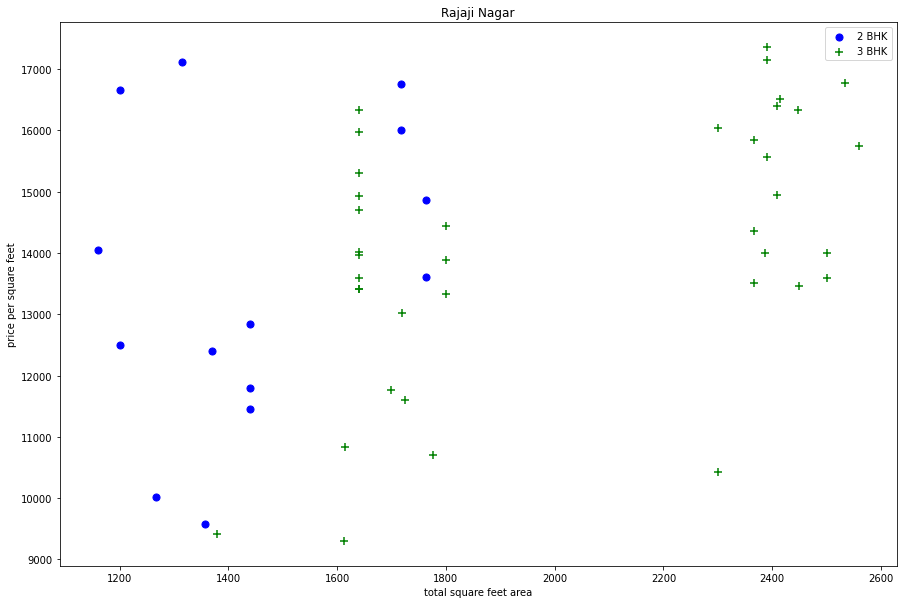

In [55]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green',label= '3 BHK',s=50)
    plt.xlabel('total square feet area')
    plt.ylabel('price per square feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Rajaji Nagar")    

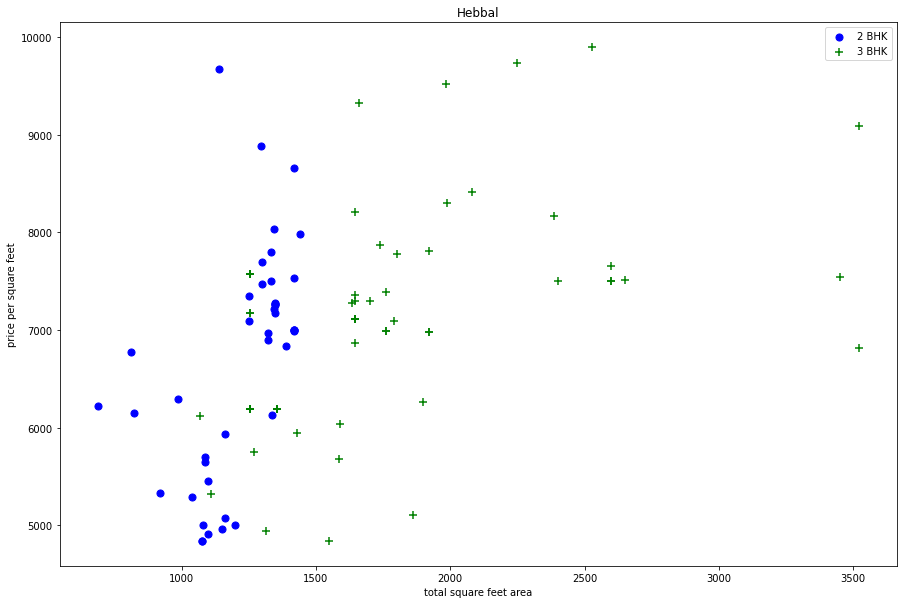

In [56]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green',label= '3 BHK',s=50)
    plt.xlabel('total square feet area')
    plt.ylabel('price per square feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Hebbal")    

In [57]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
                
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')           
        

In [58]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

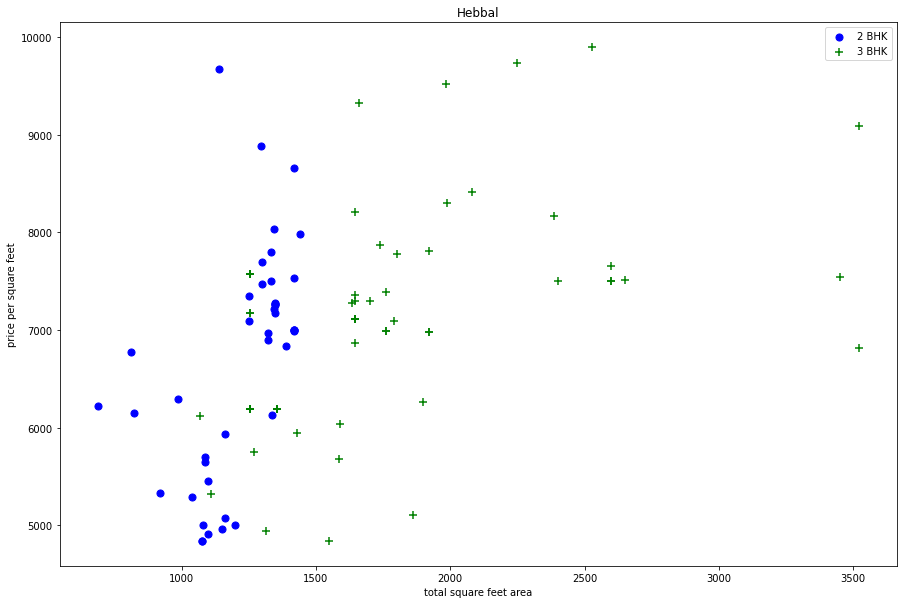

In [59]:
plot_scatter_chart(df7,'Hebbal')

Text(0, 0.5, 'count')

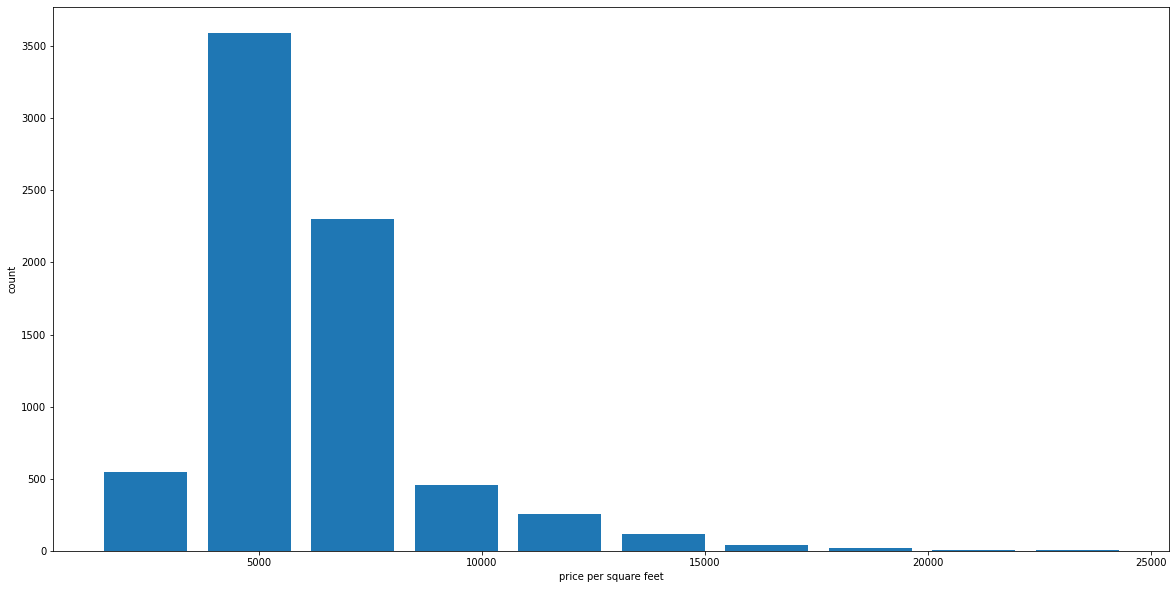

In [60]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [61]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
df8.bath

0        4.0
1        3.0
2        2.0
3        2.0
4        2.0
        ... 
10232    2.0
10233    1.0
10236    2.0
10237    1.0
10240    5.0
Name: bath, Length: 7329, dtype: float64

In [63]:
df8.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


In [64]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

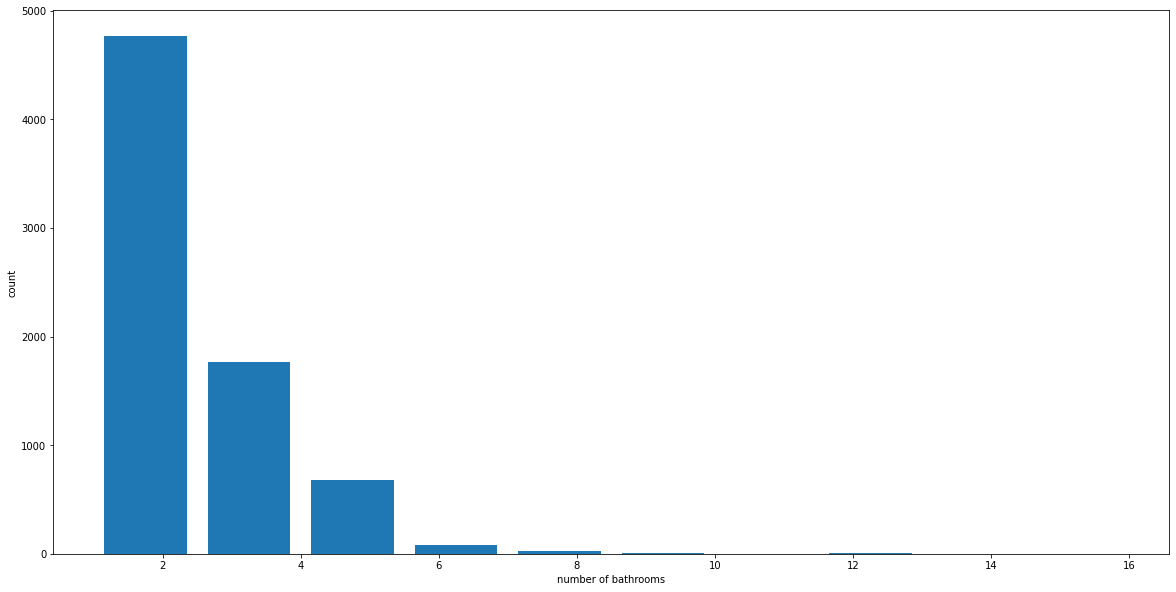

In [65]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [66]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [67]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [68]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(7)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4


In [69]:
dummies=pd.get_dummies(df10.location)

In [70]:
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df12=df11.drop('location',axis='columns')
df12.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df12.shape

(7251, 245)

In [74]:
X = df12.drop('price',axis='columns')

In [75]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [78]:
from sklearn.linear_model import LinearRegression
Ir_clf = LinearRegression()
Ir_clf.fit(X_train,y_train)


LinearRegression()

In [79]:
Ir_clf.score(X_train,y_train)

0.8541850010771193

In [80]:
Ir_clf.score(X_test,y_test)

0.845227769787434

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = Ir_clf.predict(X_test)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("LINEAR REGRESSION RMSE: {:.3f}".format(rmse1))
print("mean squared error :%.2f" % mse)
print("R2 SCORE:%.2f" % r2)

LINEAR REGRESSION RMSE: 27.987
mean squared error :783.27
R2 SCORE:0.85


In [83]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [84]:
model_RFR.score(X_train,y_train)

0.9579426346074444

In [85]:
model_RFR.score(X_test,y_test)

0.7803936831953643

In [86]:
y_pred = model_RFR.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
mse1 = mean_squared_error(y_test,y_pred)
r21 = r2_score(y_test,y_pred)
print("RANDOM FOREST RMSE: {:.3f}".format(rmse2))
print("mean squared error :%.2f" % mse1)
print("R2 SCORE:%.2f" % r21)

RANDOM FOREST RMSE: 33.337
mean squared error :1111.38
R2 SCORE:0.78


In [87]:
from sklearn import svm
from sklearn.svm import SVC
model_SVR= svm.SVR()
model_SVR.fit(X_train,y_train)

SVR()

In [88]:
model_SVR.score(X_train,y_train)

0.5119679639983428

In [89]:
model_SVR.score(X_test,y_test)

0.6450869012513898

In [90]:
y_pred = model_SVR.predict(X_test)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("RMSE: {:.3f}".format(rmse4))
print(f"svm MSE: {mse}")
print("R-squared: {:.3f}".format(r2))

RMSE: 42.381
svm MSE: 1796.132035602058
R-squared: 0.645


In [91]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=10, random_state=42),
    svm.SVR()
]

for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{type(model).__name__} RMSE: {rmse}")


LinearRegression RMSE: 27.986889672219736
RandomForestRegressor RMSE: 33.296753696213116
SVR RMSE: 42.38079795853375


In [92]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [93]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [94]:
def predict_price(location,sqft,bhk,bath):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bhk
    x[2]=bath
    
    if loc_index>=0:
        x[loc_index]=1
    return Ir_clf.predict([x])[0]

In [95]:
predict_price('1st Phase JP Nagar',1200, 2,2)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.38212155679653

In [96]:
def calculate_land_price(total_sqft, price, bhk):
    h_price = ((price / total_sqft)* bhk)*100
    land_price = price - h_price
    return land_price


In [97]:
calculate_land_price(1300, 70, 3)

53.84615384615385

In [98]:
def convert_land_price(row):
    total_sqft = row['total_sqft']
    bhk = row['bhk']
    house_price = row['price']
    h_price = ((house_price / (total_sqft))* bhk)*100
    land_price = house_price - h_price
    return land_price

# apply the function to the dataframe to calculate land price
df10['land_price'] = df10.apply(convert_land_price, axis=1)

# save the updated dataframe to a new file
print(df10[['location', 'total_sqft', 'price', 'bhk', 'land_price']])

                  location  total_sqft  price  bhk  land_price
0      1st Block Jayanagar      2850.0  428.0    4  367.929825
1      1st Block Jayanagar      1630.0  194.0    3  158.294479
2      1st Block Jayanagar      1875.0  235.0    3  197.400000
3      1st Block Jayanagar      1200.0  130.0    3   97.500000
4      1st Block Jayanagar      1235.0  148.0    2  124.032389
...                    ...         ...    ...  ...         ...
10232                other      1200.0   70.0    2   58.333333
10233                other      1800.0  200.0    1  188.888889
10236                other      1353.0  110.0    2   93.739837
10237                other       812.0   26.0    1   22.798030
10240                other      3600.0  400.0    4  355.555556

[7251 rows x 5 columns]


In [99]:
predict_price('1st Phase JP Nagar',1200, 2,2)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.38212155679653

In [100]:
predict_price('Kasturi Nagar',1200, 2,2)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.17517193568924

In [101]:
predict_price('Rajaji Nagar',1200, 2,2)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


235.0238680155214

In [102]:
predict_price('Rajaji Nagar',1200, 1, 2)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


229.94484307101254

In [103]:
predict_price('Rajaji Nagar',1200, 3,2)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


240.1028929600303

In [104]:
predict_price('Kasturi Nagar',1200, 2,2)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.17517193568924

In [105]:
calculate_land_price(1200, 70, 3)

52.5

In [106]:
calculate_land_price(1300, 50, 4)

34.61538461538461

In [107]:
calculate_land_price(2300, 170, 3)

147.82608695652175

In [108]:
calculate_land_price(2300, 70, 4)

57.826086956521735

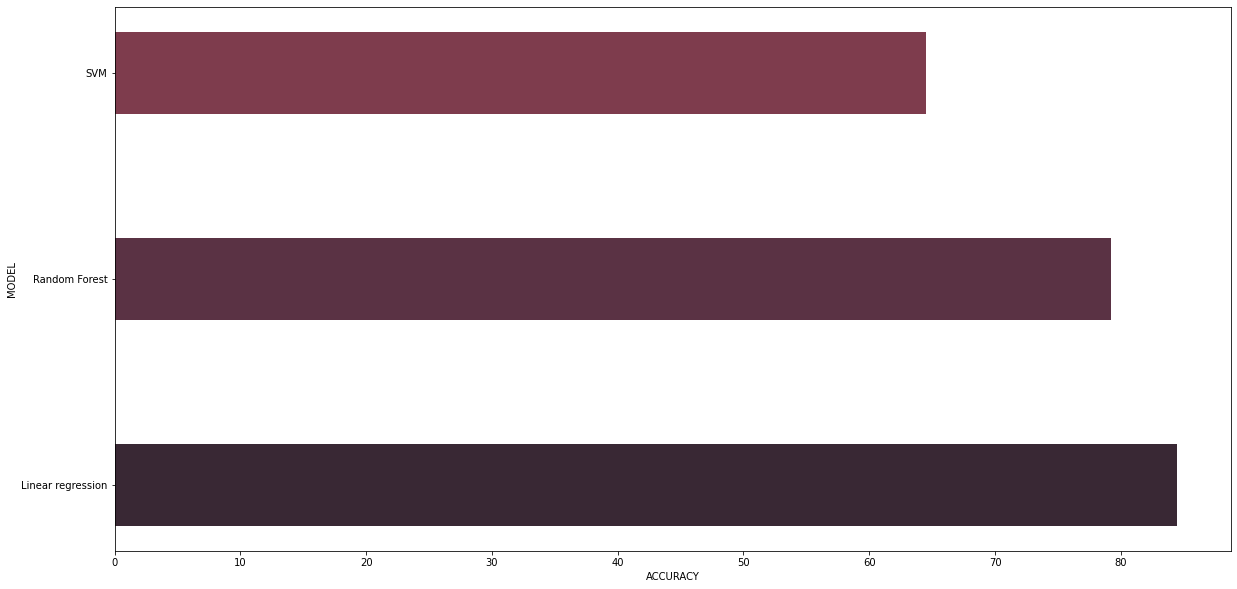

In [109]:
x = ['Linear regression', 'Random Forest', 'SVM']
y = [84.5, 79.2, 64.5]
colors = ["#392834", "#5a3244", "#7e3c4d"]
fig,ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="ACCURACY", ylabel="MODEL");

In [110]:
def calculate_rent(price):
    rent = (price * 0.0015)
    return rent

In [111]:
calculate_rent(300)

0.45

In [112]:
def calculate_rent_price(row):
    total_sqft = row['total_sqft']
    bhk = row['bhk']
    house_price = row['price']
    rent_price = house_price * 0.0015
    return rent_price

# apply the function to the dataframe to calculate land price
df10['house_rent_price'] = df10.apply(calculate_rent_price, axis=1)

# save the updated dataframe to a new file
print(df10[['location', 'total_sqft', 'price', 'bhk', 'land_price', 'house_rent_price']])

                  location  total_sqft  price  bhk  land_price  \
0      1st Block Jayanagar      2850.0  428.0    4  367.929825   
1      1st Block Jayanagar      1630.0  194.0    3  158.294479   
2      1st Block Jayanagar      1875.0  235.0    3  197.400000   
3      1st Block Jayanagar      1200.0  130.0    3   97.500000   
4      1st Block Jayanagar      1235.0  148.0    2  124.032389   
...                    ...         ...    ...  ...         ...   
10232                other      1200.0   70.0    2   58.333333   
10233                other      1800.0  200.0    1  188.888889   
10236                other      1353.0  110.0    2   93.739837   
10237                other       812.0   26.0    1   22.798030   
10240                other      3600.0  400.0    4  355.555556   

       house_rent_price  
0                0.6420  
1                0.2910  
2                0.3525  
3                0.1950  
4                0.2220  
...                 ...  
10232            0.1050  

In [113]:
df10.head(10)

,location,total_sqft,bath,price,bhk,land_price,house_rent_price
0,1st Block Jayanagar,2850.0,4.0,428.0,4,367.929825,0.6420
1,1st Block Jayanagar,1630.0,3.0,194.0,3,158.294479,0.2910
2,1st Block Jayanagar,1875.0,2.0,235.0,3,197.400000,0.3525
3,1st Block Jayanagar,1200.0,2.0,130.0,3,97.500000,0.1950
4,1st Block Jayanagar,1235.0,2.0,148.0,2,124.032389,0.2220
5,1st Block Jayanagar,2750.0,4.0,413.0,4,352.927273,0.6195
6,1st Block Jayanagar,2450.0,4.0,368.0,4,307.918367,0.5520
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,140.280000,0.2505
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,56.666667,0.1275
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,179.491525,0.3150


In [114]:
def calculate_land_rent_price(row):
    total_sqft = row['total_sqft']
    bhk = row['bhk']
    land_price_1 = row['land_price']
    land_rent_price = land_price_1 * 0.0015
    return land_rent_price

# apply the function to the dataframe to calculate land price
df10['land_rent_price'] = df10.apply(calculate_land_rent_price, axis=1)

# save the updated dataframe to a new file
print(df10[['location', 'total_sqft', 'price', 'bhk', 'land_price', 'land_rent_price']])

                  location  total_sqft  price  bhk  land_price  \
0      1st Block Jayanagar      2850.0  428.0    4  367.929825   
1      1st Block Jayanagar      1630.0  194.0    3  158.294479   
2      1st Block Jayanagar      1875.0  235.0    3  197.400000   
3      1st Block Jayanagar      1200.0  130.0    3   97.500000   
4      1st Block Jayanagar      1235.0  148.0    2  124.032389   
...                    ...         ...    ...  ...         ...   
10232                other      1200.0   70.0    2   58.333333   
10233                other      1800.0  200.0    1  188.888889   
10236                other      1353.0  110.0    2   93.739837   
10237                other       812.0   26.0    1   22.798030   
10240                other      3600.0  400.0    4  355.555556   

       land_rent_price  
0             0.551895  
1             0.237442  
2             0.296100  
3             0.146250  
4             0.186049  
...                ...  
10232         0.087500  
10233  

In [115]:
df10.head()

,location,total_sqft,bath,price,bhk,land_price,house_rent_price,land_rent_price
0,1st Block Jayanagar,2850.0,4.0,428.0,4,367.929825,0.6420,0.551895
1,1st Block Jayanagar,1630.0,3.0,194.0,3,158.294479,0.2910,0.237442
2,1st Block Jayanagar,1875.0,2.0,235.0,3,197.400000,0.3525,0.296100
3,1st Block Jayanagar,1200.0,2.0,130.0,3,97.500000,0.1950,0.146250
4,1st Block Jayanagar,1235.0,2.0,148.0,2,124.032389,0.2220,0.186049


In [116]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(Ir_clf,f)

In [117]:
import json
columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))